In [1]:
import scanpy as sc
import anndata2ri
import logging
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import rpy2.rinterface_lib.callbacks as rcb
import rpy2.robjects as ro
sc.settings.verbosity = 0
sc.settings.set_figure_params(
dpi=80,
facecolor="white",
frameon=False,
)
rcb.logger.setLevel(logging.ERROR)
ro.pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

/tmp/ipykernel_71/3016963942.py:17: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  anndata2ri.activate()


In [2]:
import palantir

In [3]:
%%R
library(slingshot)

Loading required package: princurve
Loading required package: TrajectoryUtils
Loading required package: SingleCellExperiment
Loading required package: SummarizedExperiment
Loading required package: MatrixGenerics
Loading required package: matrixStats

Attaching package: ‘MatrixGenerics’

The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps

In [2]:
%%R
library(scry)

In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


In [3]:
adata = sc.read(
filename="s4d8_normalization.h5ad",
backup_url="https://figshare.com/ndownloader/files/40015741",
)

In [4]:
ro.globalenv['adata'] = adata

In [5]:
%%R
sce = devianceFeatureSelection(adata, assay="X")

In addition: Warning messages:
1: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages
2: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages
3: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages
4: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


In [6]:
binomial_deviance = ro.r("rowData(sce)$binomial_deviance").T

In [12]:
idx = binomial_deviance.argsort()[-4000:]
mask = np.zeros(adata.var_names.shape, dtype=bool)
mask[idx] = True
adata.var['binomial_deviance'] = binomial_deviance
adata.var['highly_deviant'] = mask

In [9]:
sc.pp.highly_variable_genes(adata, layer='scran_normalized')

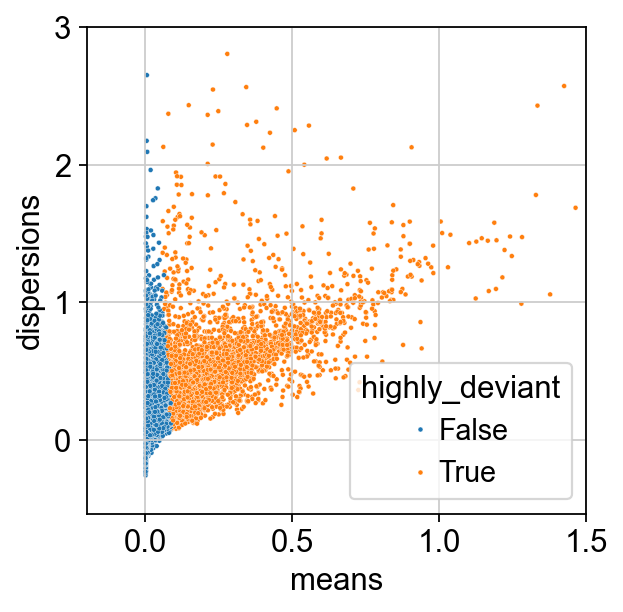

In [15]:
ax = sns.scatterplot(adata.var, x='means', y='dispersions', hue='highly_deviant', s=5)
ax.set_xlim(None, 1.5)
ax.set_ylim(None, 3)
plt.show()

In [16]:
adata.write("s4d8_feature_selection.h5ad")